Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
E

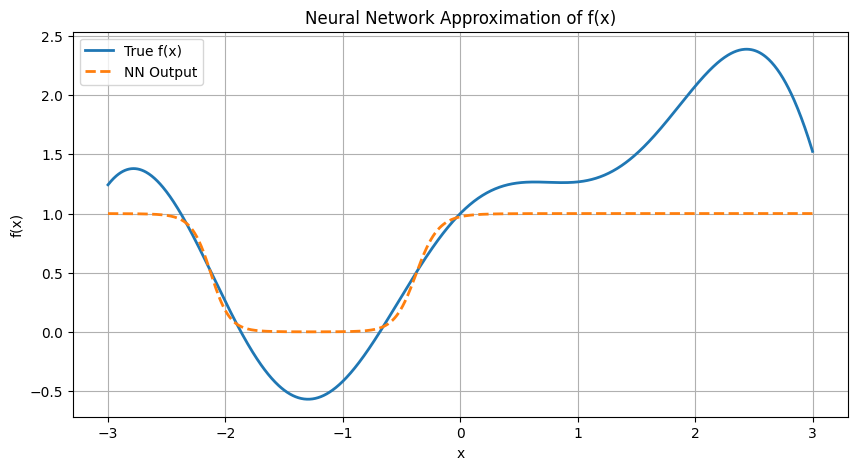

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define true function
def f(x):
    return (1 + x) * np.sin(x) + np.cos(2 * x)

# Generate training data
x_vals = np.linspace(-3, 3, 1000)
y_vals = f(x_vals)
training_data = [(np.array([[x]]), np.array([[y]])) for x, y in zip(x_vals, y_vals)]

# Activation functions
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1 - np.tanh(z)**2

# Original Network Class
class Network:
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        training_data = list(training_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k + mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            print(f"Epoch {j + 1} complete")

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - eta * nw / len(mini_batch) for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - eta * nb / len(mini_batch) for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].T)
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].T)
        return nabla_b, nabla_w

    def cost_derivative(self, output_activations, y):
        return output_activations - y

# Train and plot for part (b)
net = Network([1, 20, 1])
net.SGD(training_data, epochs=300, mini_batch_size=10, eta=0.5)
predicted_vals = [net.feedforward(np.array([[x]])).flatten()[0] for x in x_vals]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label="True f(x)", linewidth=2)
plt.plot(x_vals, predicted_vals, '--', label="NN Output", linewidth=2)
plt.legend()
plt.grid(True)
plt.title("Neural Network Approximation of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

 Architecture Details:
Input Layer:
1 neuron — represents the single input x∈R.
No bias or activation is applied to the input layer.
Hidden Layer:
20 neurons
Each neuron:
Receives input from the single input neuron.
Applies a sigmoid activation function to introduce non-linearity.
Biases are used for each neuron in this layer.
Output Layer:
1 neuron
Collects input from all 20 neurons in the hidden layer.
Applies the sigmoid activation function to produce the final output


(b) Training and Evaluation of the Neural Network

In [3]:
net = Network([1, 20, 1])
net.SGD(training_data, epochs=300, mini_batch_size=10, eta=0.5)

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
E

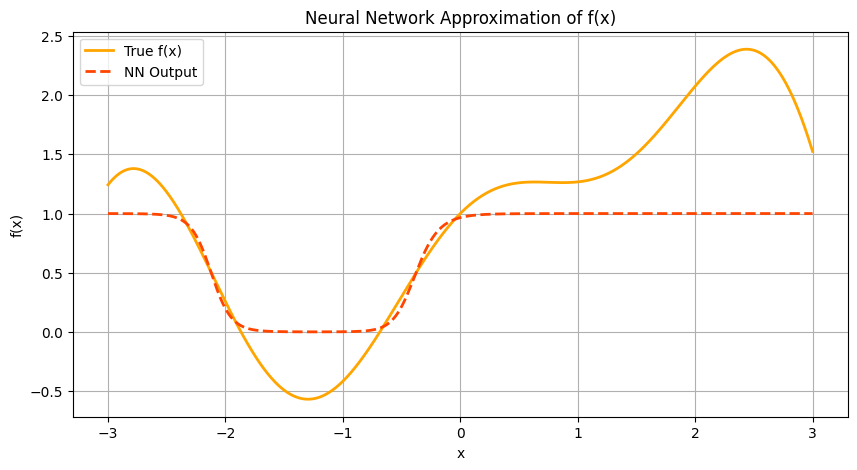

In [4]:
predicted_vals = [net.feedforward(np.array([[x]])).flatten()[0] for x in x_vals]

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label="True f(x)", linewidth=2, color='orange')
plt.plot(x_vals, predicted_vals, '--', label="NN Output", linewidth=2, color='orangered')
plt.legend()
plt.grid(True)
plt.title("Neural Network Approximation of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

(c) Create a modified version of the Network class (call it ModNetwork) to obtain
an architecture more suited to the approximation task you should perform.
Clearly describe in at most a couple of sentences the modifications you performed and why they should work

In [9]:
# Define tanh and its derivative for use in ModNetwork
def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1 - np.tanh(z) ** 2

# Modified version of Network class: ModNetwork
class ModNetwork:
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            z = np.dot(w, a) + b
            if i < self.num_layers - 2:  # Hidden layers: tanh
                a = tanh(z)
            else:  # Output layer: linear
                a = z
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta):
        training_data = list(training_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k + mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            print(f"Epoch {j + 1} complete")

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - eta * nw / len(mini_batch) for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - eta * nb / len(mini_batch) for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x]
        zs = []
        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            z = np.dot(w, activation) + b
            zs.append(z)
            if i < self.num_layers - 2:
                activation = tanh(z)
            else:
                activation = z  # Linear output
            activations.append(activation)
        delta = (activations[-1] - y)  # MSE derivative for linear output
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].T)
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = tanh_prime(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].T)
        return nabla_b, nabla_w


Modified Network: ModNetwork

In [10]:
modnet = ModNetwork([1, 40, 20, 1])  # or [1, 20, 1] for part (d)
modnet.SGD(training_data, epochs=300, mini_batch_size=10, eta=0.5)

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete


<ipython-input-9-652b2e16000e>:65: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l + 1].T, delta) * sp


Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
Epoch 57 complete
Epoch 58 complete
Epoch 59 complete
Epoch 60 complete
Epoch 61 complete
Epoch 62 complete
Epoch 63 com

(d) Create a new network using the new class as “modnet=ModNetwork([1,20,1])”
and describe its architecture.

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete


<ipython-input-9-652b2e16000e>:65: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l + 1].T, delta) * sp


Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
Epoch 57 complete
Epoch 58 complete
Epoch 59 complete
Epoch 60 complete
Epoch 61 compl

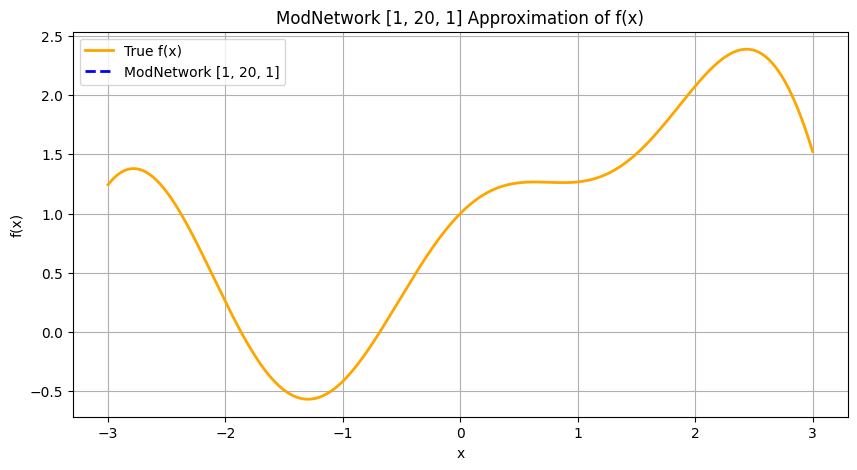

In [11]:
# Create ModNetwork instance with architecture [1, 20, 1] as required in part (d)
modnet_d = ModNetwork([1, 20, 1])

# Train the model using the same training data and settings
modnet_d.SGD(training_data, epochs=300, mini_batch_size=10, eta=0.5)

# Evaluate the model output
predicted_mod_d = [modnet_d.feedforward(np.array([[x]])).flatten()[0] for x in x_vals]

# Plot the model output vs true function
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label="True f(x)", linewidth=2, color='orange')
plt.plot(x_vals, predicted_mod_d, '--', label="ModNetwork [1, 20, 1]", linewidth=2, color='blue')
plt.legend()
plt.grid(True)
plt.title("ModNetwork [1, 20, 1] Approximation of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()